<AxesSubplot:xlabel='Survived', ylabel='count'>

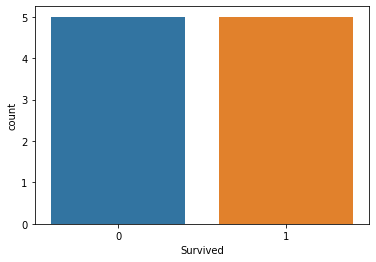

In [89]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

titanic_data= pd.read_excel('c:\\USERS\\DELL\Desktop\\pythonexcel\\titanic.xlsx')
sns.countplot(x="Survived", data=titanic_data)      # Analyzing data by plotting survived=1 and dead=0

In [90]:
print("Total no of data in excel:" +str(len(titanic_data.index)))  #printing total no of data in excel sheet

Total no of data in excel:10


In [91]:
titanic_data.head(8)                                #printing 8 data sets from total of 10 data

,Passengerid,Survived,Pasclass,Names,Sex,Age,Parch,Ticket,Cabin
0,1,0,3,anderw,male,22.0,0,1452,NaN
1,2,1,1,mike,male,38.0,0,1236,C8
2,3,1,3,shara,female,NaN,0,2584,NaN
3,4,1,1,guti,male,35.0,0,1456,C3
4,5,0,3,michale,male,35.0,0,4862,C2
5,6,0,3,gean,female,NaN,0,2489,C2
6,7,0,1,garry,female,35.0,0,1247,C1
7,8,0,3,martin,male,NaN,1,25895,NaN


Text(0.5, 0, 'survived and dead')

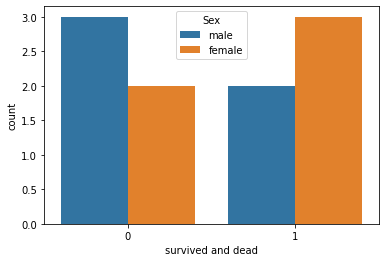

In [92]:
fig, ax=plt.subplots()                                                #providing external axes for ax.set|_xlabel()
sns.countplot(x="Survived", hue="Sex", data=titanic_data)             #plotting Survived=1 and dead=0 no of people in terms of sex
ax.set_xlabel("survived and dead")


<AxesSubplot:xlabel='Survived', ylabel='count'>

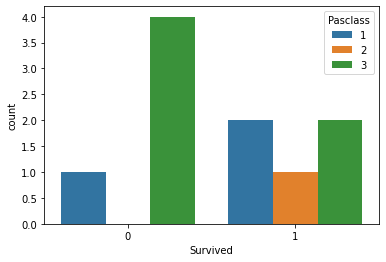

In [93]:
sns.countplot(x="Survived", hue="Pasclass", data=titanic_data)     #plotting data of dead and survived people in term of age and passenger class

<AxesSubplot:ylabel='Frequency'>

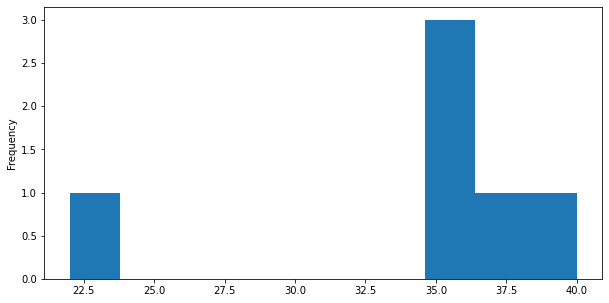

In [94]:
titanic_data["Age"].plot.hist(bins=10, figsize=(10,5))           #plottinh histogramof AGE 

Data Wrangling

In [95]:
titanic_data.isnull().sum()                    #Printing data that has null value

Passengerid    0
Survived       0
Pasclass       0
Names          0
Sex            0
Age            4
Parch          0
Ticket         0
Cabin          3
dtype: int64

<AxesSubplot:>

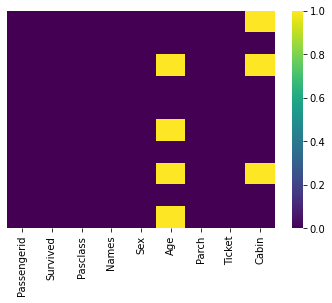

In [96]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")          #checking the null values in sheet with help of colour code  black= filled data, yellow = null valued

In [97]:
#titanic_data.drop("Cabin", axis=1, inplace=True)            #Dropping the Cabin column from the sheet which has null values 
titanic_data.dropna(inplace=True)                          #adding some dummy values in remaining null values of Age column

In [98]:
titanic_data.head(9)

,Passengerid,Survived,Pasclass,Names,Sex,Age,Parch,Ticket,Cabin
1,2,1,1,mike,male,38.0,0,1236,C8
3,4,1,1,guti,male,35.0,0,1456,C3
4,5,0,3,michale,male,35.0,0,4862,C2
6,7,0,1,garry,female,35.0,0,1247,C1
8,9,1,3,angela,female,40.0,2,1334,c1


In [99]:
import pandas as pd
titanic_data=pd.read_excel('c:\\USERS\\DELL\\Desktop\\pythonexcel\\titanic.xlsx')
sex=pd.get_dummies(titanic_data['Sex'], drop_first=True)                   #creating dummies values of Sex for both male and female and dropping 1st coln of female 
titanic_data.drop(['Pasclass', 'Parch', 'Passengerid', 'Names', 'Sex', 'Cabin', 'Age', 'Ticket'],  axis=1, inplace=True)    #Dropped Pasclass nd Parch
titanic_data=pd.concat([titanic_data,sex], axis=1)                                                         #Concating dummy valus of sex in titanic_data
titanic_data.head(3) #printing the concatinated data



,Survived,male
0,0,1
1,1,1
2,1,0


Train Data

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

SUV_data= pd.read_excel('c:\\USERS\\DELL\Desktop\\pythonexcel\\SUVcar.xlsx')
SUV_data.head(10)

,Userid,Age,Salary,Purchased
0,11101,24,12000,0
1,11102,32,25000,0
2,11103,56,60000,2
3,11104,18,10000,0
4,11105,36,30000,1
5,11106,50,54000,2
6,11107,48,50000,1
7,11108,45,48000,1
8,11109,40,45000,1
9,11110,43,47000,1


In [4]:
X= SUV_data.iloc[:, [1,2]].values         #Defining Indepandent var ':' as all rows & [1,2] coln, using iloc from pandas for indexing(integer) based selection
y= SUV_data.iloc[:,3].values              #Defining dependent var 'y',':' for all rows & 3 as coln 3rd
X,y                                       #Printing X, y as array

(array([[   24, 12000],
        [   32, 25000],
        [   56, 60000],
        [   18, 10000],
        [   36, 30000],
        [   50, 54000],
        [   48, 50000],
        [   45, 48000],
        [   40, 45000],
        [   43, 47000]], dtype=int64),
 array([0, 0, 2, 0, 1, 2, 1, 1, 1, 1], dtype=int64))

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression
Classfier = LogisticRegression(random_state = 0)
Classfier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [2]:
y_pred = Classfier.predict(X_test)
y_pred, y_train


NameError: name 'X_test' is not defined

In [75]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_train, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [7, 3]